Loading graph...
Computing Eigenvector Centrality...


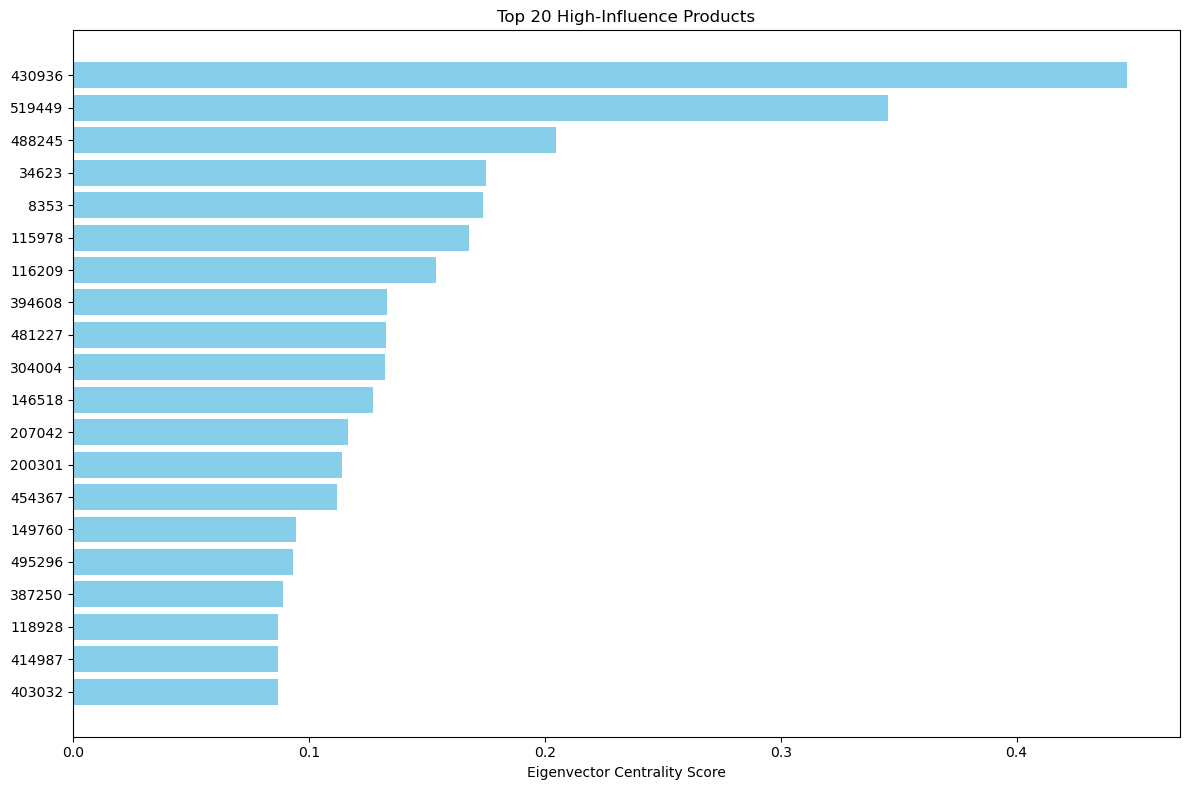

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

def load_graph(file_path):
    G = nx.DiGraph()
    with open(file_path, 'r') as f:
        for line in f:
            if line.startswith('#'):
                continue
            parts = line.strip().split()
            if len(parts) != 2:
                continue
            u, v = parts
            G.add_edge(u, v)
            G.add_edge(v, u) 
    return G

def compute_eigenvector_centrality(G):
    return nx.eigenvector_centrality(G, max_iter=1000, tol=1e-6)

def main():
   
   
    G = load_graph('reduceddataset.txt')
    
    
    
    centrality = compute_eigenvector_centrality(G)
    
    
    top_products = sorted(centrality.items(), key=lambda x: x[1], reverse=True)[:20]
    products, scores = zip(*top_products)

    df = pd.DataFrame({'Product': products, 'Eigenvector Centrality': scores})
    
    plt.figure(figsize=(12, 8))
    plt.barh(df['Product'], df['Eigenvector Centrality'], color='skyblue')
    plt.gca().invert_yaxis()  # Highest on top
    plt.xlabel('Eigenvector Centrality Score')
    plt.title('Top 20 High-Influence Products')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()